In [1]:
import numpy as np
import yfinance as yf
import os
import sys

proj_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
if proj_path not in sys.path:
    sys.path.append(proj_path)

from wavelet_filter import Wavelet_Filter
from utils import plot_original_vs_filtered

In [2]:
nvidia_data = yf.download(['NVDA'], period="12mo", interval="1h")

/var/folders/nc/2fhlmlb174j1xg908_jm3bsw0000gn/T/ipykernel_60437/707199564.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nvidia_data = yf.download(['NVDA'], period="12mo", interval="1h")
[*********************100%***********************]  1 of 1 completed


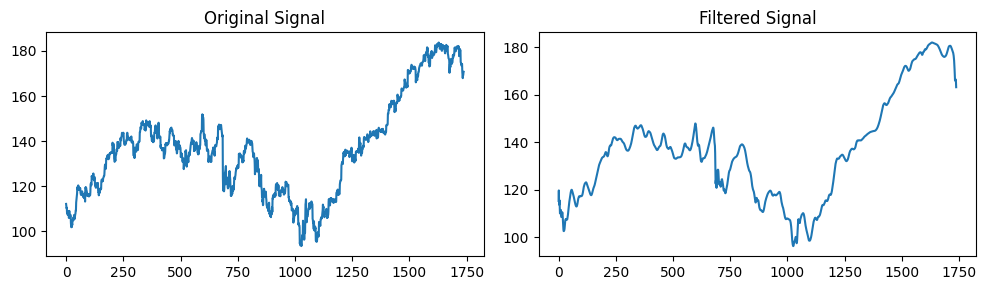

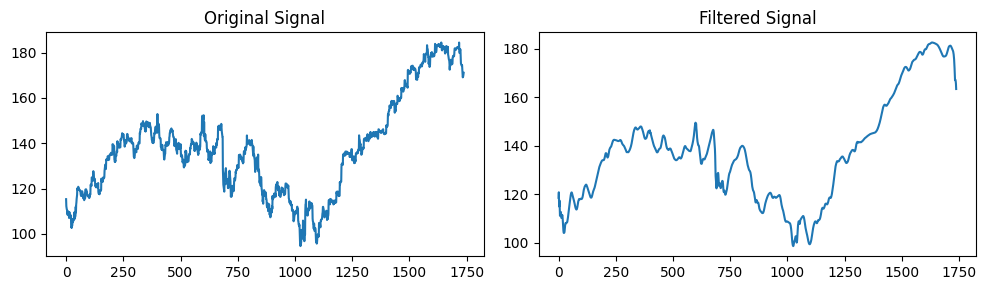

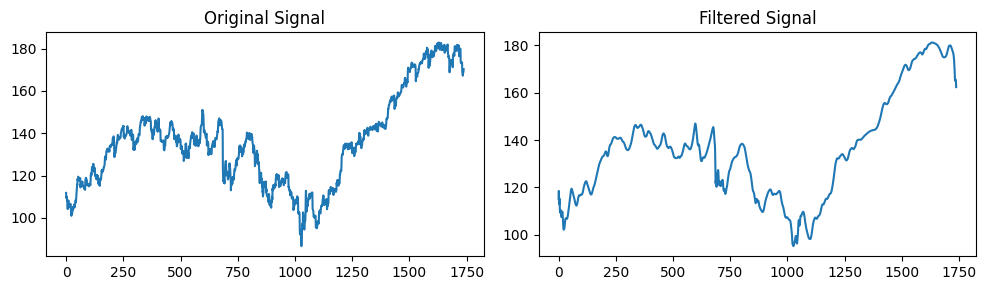

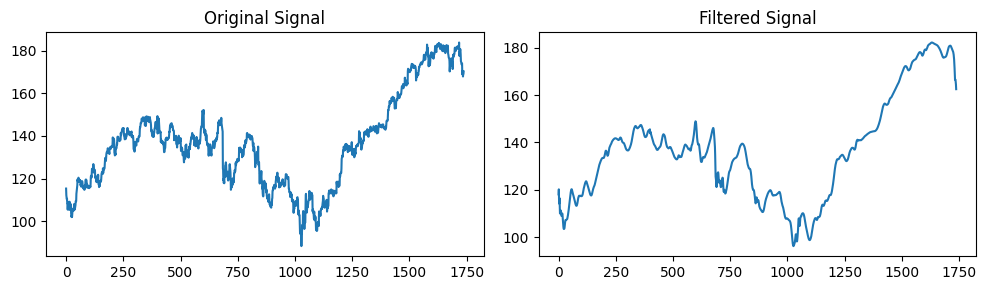

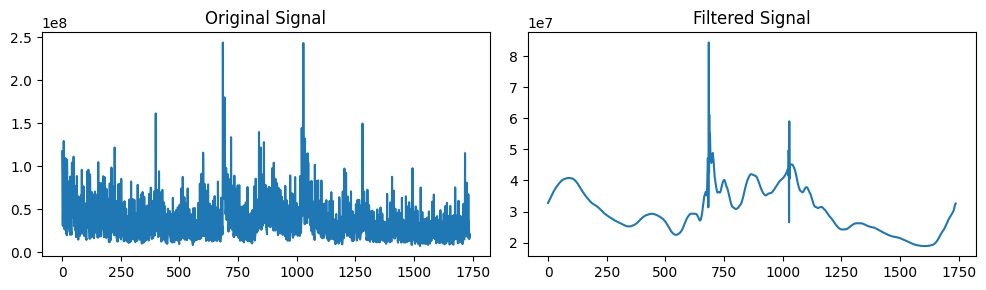

In [3]:
start = 0
end = len(nvidia_data)
sr = 1

for col in nvidia_data.columns:
    wavelet_filter = Wavelet_Filter(threshold_type="soft", wavelet="db5", 
                                    level = 2, mode = "per", x=np.array(nvidia_data[col[0]]))
    
    reconstr = wavelet_filter._filter(scaling_factor=0.75, universal=True, operation="mean")
    plot_original_vs_filtered(x = np.array(nvidia_data[col[0]]), x_hat = reconstr, 
                              start = start, 
                              end = end, 
                              sr=sr)